In [5]:
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

mypathE                  = "/home/oline/Documents/GRAPPA/ExtremeAstrophysics/Project/git/StellarDynamics/ODESolved.txt"



def read_files(path):  
    
    x, y, z = [],[],[]
    vx, vy, vz = [],[],[]
    t = []
    
    
    with open(path, 'r') as infile:
        lines = infile.readlines()[2:]
        for line in lines:

            line = line.split()
            t.append(float(line[0]))
            x.append(float(line[1]))
            y.append(float(line[2]))
            z.append(float(line[3]))
            vx.append(float(line[4]))
            vy.append(float(line[5]))
            vz.append(float(line[6]))
    
    r = np.zeros((len(x), 3))
    v = np.zeros((len(x), 3))
    for i in range(len(x)):
        r[i] = [x[i], y[i], z[i]]
        v[i] = [vx[i], vy[i], vz[i]]
        
    return np.array(x), np.array(y),np.array(z), t, r, v

x,y,z,tE,rE, vE = read_files(mypathE)
n_itt = len(rE)

/home/oline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


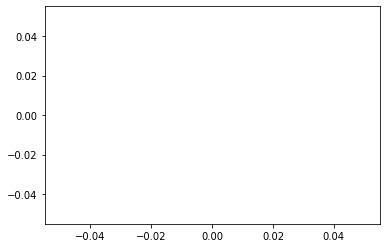

In [6]:
plt.plot(np.sqrt(rE[:,0])**2 + np.sqrt(rE[:,1])**2)

In [7]:
rE[:,0]**2

array([3.61570225e+06, 3.57278043e+06, 3.44488448e+06, 3.23463822e+06,
       2.94671556e+06, 2.58794786e+06, 2.16825625e+06, 1.70138110e+06,
       1.20696590e+06, 7.14452634e+05, 2.73274881e+05, 1.21515685e+03,
       9.91960221e+06, 5.39413865e+07, 1.43800869e+08, 2.87573764e+08,
       4.91748365e+08, 7.61870404e+08, 1.10282440e+09, 1.51902724e+09,
       2.01451960e+09, 2.59302972e+09, 3.25806932e+09, 4.01290576e+09,
       4.86065530e+09, 5.80427612e+09, 6.84658608e+09, 7.99028605e+09,
       9.23793944e+09, 1.05921147e+10, 1.20551616e+10, 1.36293950e+10,
       1.53170326e+10, 1.71201523e+10, 1.90412401e+10, 2.10821688e+10,
       2.32449664e+10, 2.55312462e+10, 2.79434686e+10, 3.04834140e+10,
       3.31523981e+10, 3.59530898e+10, 3.88862624e+10, 4.19540999e+10,
       4.51583750e+10, 4.85008124e+10, 5.19826320e+10, 5.56058845e+10,
       5.93716576e+10, 6.32819305e+10, 6.73376550e+10, 7.15412708e+10,
       7.58930872e+10, 8.03954987e+10, 8.50492234e+10, 8.98560576e+10,
      

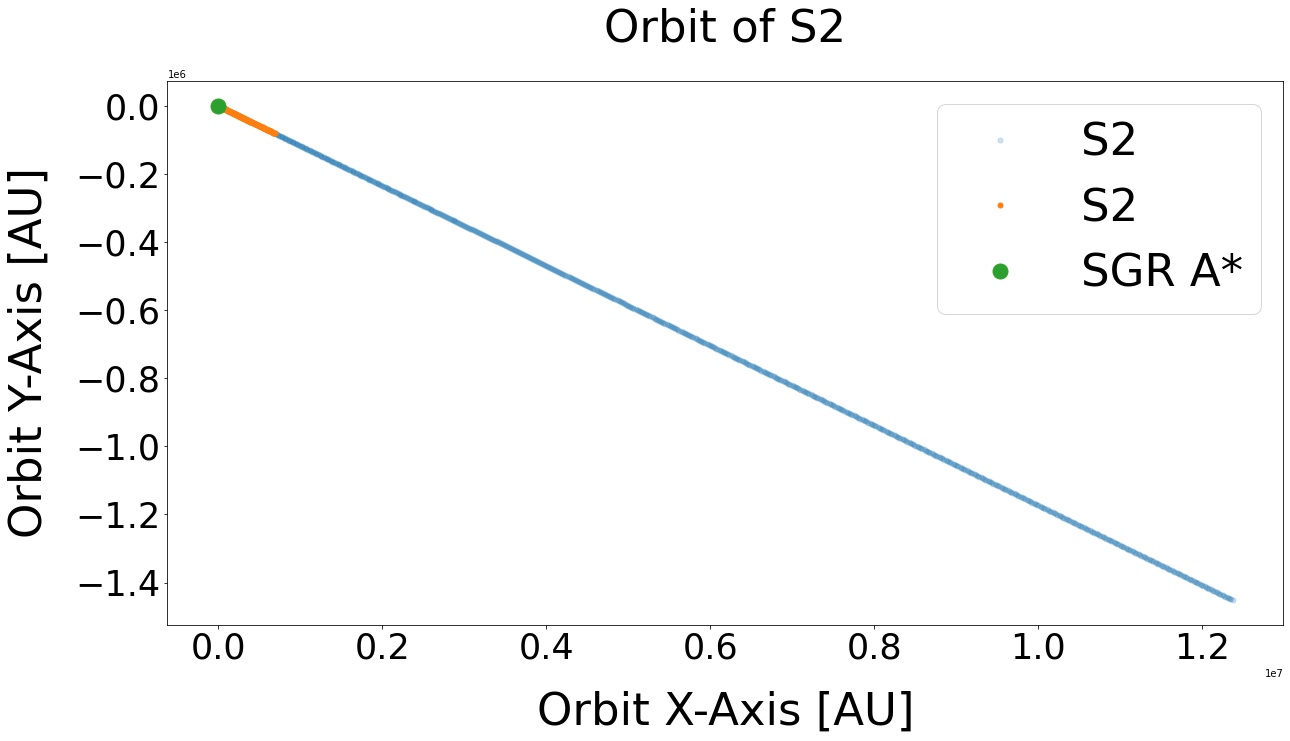

In [8]:
plt.figure(figsize = (20,10))
fsize = 45

plt.plot(rE[:,0],rE[:,1], '.', ms = 10, label = 'S2', alpha = 0.2)
plt.plot(rE[:100,0],rE[:100,1], '.', ms = 10, label = 'S2')
plt.plot([0],[0], '.', ms = 30, label = 'SGR A*')

plt.ylabel('Orbit Y-Axis [AU]', fontsize = fsize, labelpad = 25)
plt.xlabel('Orbit X-Axis [AU]', fontsize = fsize,  labelpad = 25)
plt.xticks(size = fsize-10)
plt.yticks(size = fsize-10)

plt.title('Orbit of S2', pad = 40, fontsize = fsize)
#plt.yticks([-1,-0.5,0,0.5,1])

plt.legend(fontsize = fsize, loc = 'upper right')
#plt.xlim([-2000,2000])
#plt.ylim([-2000,2000])
#plt.savefig('../Paper/Figures/EC.png')

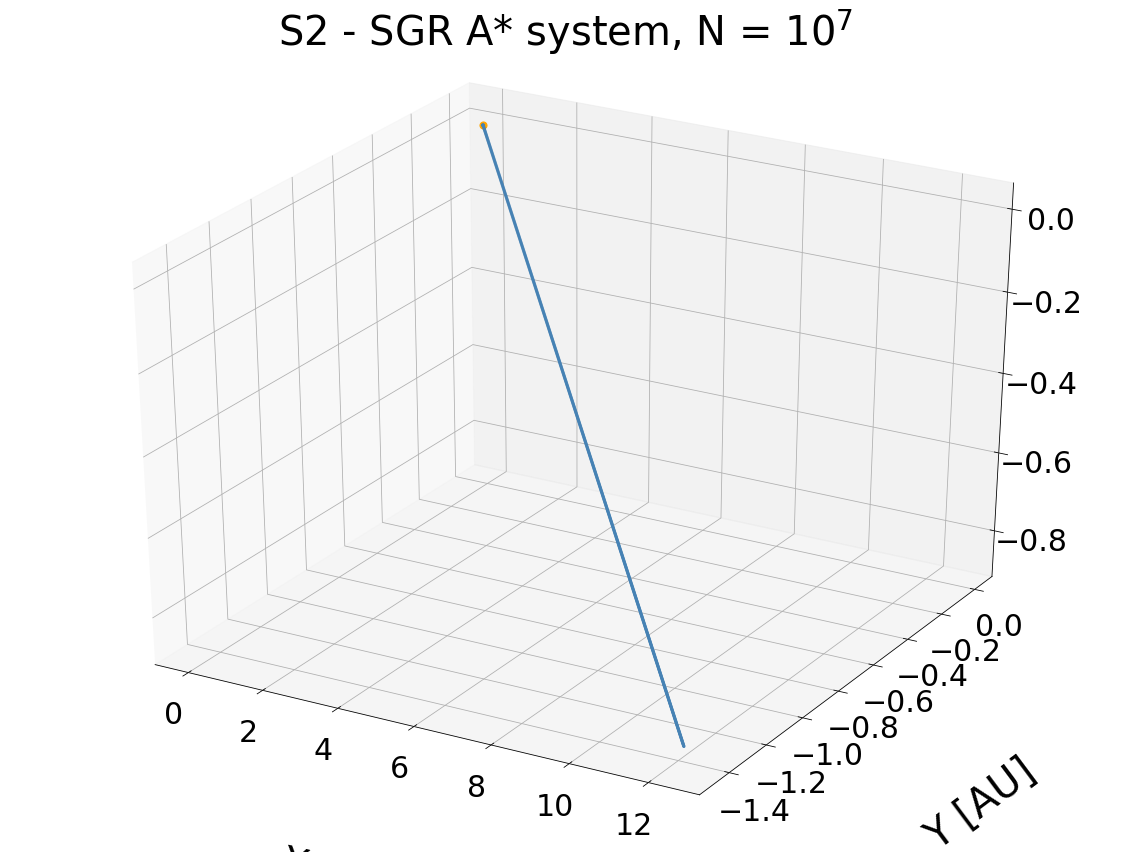

In [180]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.colors

fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')

fsize = 40


ax.scatter3D(0,0,0, s = 50, c = 'orange', label = 'The sun')

ax.scatter3D(rE[:,0]*1e-6, rE[:,1]*1e-6, rE[:,2]*1e-6, marker = '.', c= 'steelblue', label = 'Euler', linestyle = '-');
ax.plot3D(rE[:,0]*1e-6, rE[:,1]*1e-6, rE[:,2]*1e-6, 'steelblue')



plt.title('S2 - SGR A* system, N = $10^7$', pad = 50, fontsize = fsize)
ax.set_xlabel('X [AU]', fontsize = fsize)
ax.set_ylabel('Y [AU]',  fontsize = fsize)
ax.set_zlabel('Z [AU]',  fontsize = fsize)
ax.xaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.yaxis.set_tick_params(labelsize=fsize-10, pad = 15)
ax.zaxis.set_tick_params(labelsize=fsize-10, pad = 15)

#plt.legend(fontsize = fsize-10, loc = 'upper left')
ax.yaxis.labelpad=100
ax.xaxis.labelpad=100
ax.zaxis.labelpad=85

#ax.set_yticks([-0.75, 0,0.75])
#ax.set_xticks([ -0.75, 0,0.75])
#ax.set_zticks([-0.75, 0,0.75])

#ax.set_xlim([-1.25,1.25])
#ax.set_ylim([-1.25,1.25])
#ax.set_zlim([-1.25,1.25])

In [151]:
def chage_to_earth_frame(x_,y_,z_):
    
    return 0


def equatorial_celestial_to_cartesian(a_, d_, dist, inc):
    x_, y_, z_ = [], [], []
    try:
        for i in range(len(a_)):
            x_.append(np.cos(a_[i])*np.cos(d_[i])*dist*np.cos(inc))
            y_.append(np.sin(a_[i])*np.cos(d_[i])*dist*np.cos(inc))
            z_.append(np.sin(d_[i])*dist*np.cos(inc))
    except TypeError:
            x_.append(np.cos(a_)*np.cos(d_)*dist)
            y_.append(np.sin(a_)*np.cos(d_)*dist)
            z_.append(np.sin(d_)*dist)
    
    return x_, y_, z_


def cartesian_to_equatorial_celestial(x_,y_,z_):
    a_, d_ = [], []
    for i in range(len(x_)):
        a_.append(np.arctan(y_[i]/x_[i]))
        d_.append(np.arcsin(z_[i]/np.sqrt(x_[i]**2 + y_[i]**2 + z_[i]**2)))
    return np.array(a_), np.array(d_)

In [152]:
a_BH =  4.64985 # Rad, 266.4168 deg
d_BH = -506.1e-3 # Rad, -29 deg
dist_BH = 1.689*10**9    # AU

In [25]:
#Setting orbital parameter values
e_s2 = 0.872
a_s2 = 0.121

rad = np.arange(0, (2 * np.pi), 0.01)

#Calculating r

r_s2 = a_s2*(1-e_s2**2)/(1+e_s2*np.cos(rad))

x_s2 = r_s2*np.cos(rad)
y_s2 = r_s2*np.sin(rad)

#More orbital parameters
Omega_s2 = 231.9*np.pi/180. #Converting to radian
omega_s2 = 68.9*np.pi/180. #Converting to radian
i_s2 = 138.1*np.pi/180. #Converting to radian


#Converting to array
Omega_s2 = np.ones(len(rad))*Omega_s2
omega_s2 = np.ones(len(rad))*omega_s2

#In sky plane
rad_sky_s2 = Omega_s2 + np.arctan(np.tan(rad+omega_s2)*np.cos(i_s2))
rho_s2 = r_s2*np.cos(rad+omega_s2)/(np.cos(rad_sky_s2-Omega_s2))

#Writing in terms of x,y
x_sky_s2 = rho_s2*np.cos(rad_sky_s2)
y_sky_s2 = rho_s2*np.sin(rad_sky_s2)

x_sky_s2

array([-1.19038443e-02, -1.18470247e-02, -1.17895669e-02, -1.17314685e-02,
       -1.16727270e-02, -1.16133396e-02, -1.15533037e-02, -1.14926163e-02,
       -1.14312745e-02, -1.13692752e-02, -1.13066151e-02, -1.12432908e-02,
       -1.11792990e-02, -1.11146359e-02, -1.10492980e-02, -1.09832814e-02,
       -1.09165821e-02, -1.08491960e-02, -1.07811189e-02, -1.07123466e-02,
       -1.06428746e-02, -1.05726982e-02, -1.05018128e-02, -1.04302136e-02,
       -1.03578955e-02, -1.02848535e-02, -1.02110824e-02, -1.01365767e-02,
       -1.00613309e-02, -9.98533948e-03, -9.90859658e-03, -9.83109627e-03,
       -9.75283251e-03, -9.67379906e-03, -9.59398957e-03, -9.51339753e-03,
       -9.43201629e-03, -9.34983904e-03, -9.26685881e-03, -9.18306849e-03,
       -9.09846079e-03, -9.01302827e-03, -8.92676335e-03, -8.83965825e-03,
       -8.75170503e-03, -8.66289561e-03, -8.57322169e-03, -8.48267484e-03,
       -8.39124643e-03, -8.29892764e-03, -8.20570949e-03, -8.11158281e-03,
       -8.01653822e-03, -

In [12]:
def calc_vec_S2(x_CM, y_CM, z_CM, x_o, y_o, z_o):
    new_x, new_y, new_z = [],[],[]
    for i in range(len(x_o)-1):
        new_x.append(x_CM + x_o[i])
        new_y.append(y_CM + y_o[i])
        new_z.append(z_CM + z_o[i])
    return np.array(new_x), np.array(new_y), np.array(new_z)

x_s2, y_s2, z_s2 = calc_vec_S2(x_BH, y_BH, z_BH,x,y,z)

NameError: name 'x_BH' is not defined

In [13]:
a_s2, d_s2 = cartesian_to_equatorial_celestial(x_s2, y_s2, z_s2)

NameError: name 'z_s2' is not defined

Text(0, 0.5, 'dec arcsec')

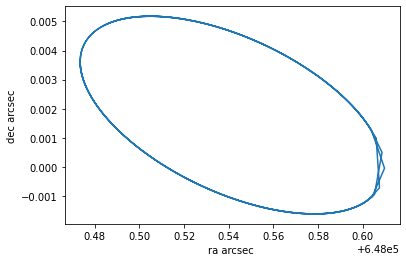

In [59]:
plt.plot((a_BH-a_s2)*206265, (d_BH-d_s2)*206265)
plt.xlabel('ra arcsec ')
plt.ylabel('dec arcsec')
#plt.plot([a_BH], [d_BH], '.')

In [41]:
(a_BH-a_s2)*206265

array([[648000.74386495],
       [648000.74385745],
       [648000.74384466],
       [648000.74382629],
       [648000.74380249],
       [648000.74377311],
       [648000.74373844],
       [648000.7436982 ],
       [648000.74365252],
       [648000.74360127],
       [648000.74354473],
       [648000.74348262],
       [648000.74341493],
       [648000.74334195],
       [648000.7432634 ],
       [648000.74317927],
       [648000.74308972],
       [648000.74299459],
       [648000.74289403],
       [648000.74278777],
       [648000.74267621],
       [648000.74255894],
       [648000.7424361 ],
       [648000.74230783],
       [648000.74217399],
       [648000.74203444],
       [648000.74188933],
       [648000.74173864],
       [648000.74158239],
       [648000.74142042],
       [648000.74125289],
       [648000.74107965],
       [648000.74090085],
       [648000.74071619],
       [648000.74052597],
       [648000.74032991],
       [648000.74012827],
       [648000.7399208 ],
       [6480

In [42]:
a_BH

4.64985